# Root to Node Path in Binary Tree

In [10]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def Paths(node, path, res):
    if node is None:
        return []
    if node.left == None and node.right == None:
        res.append(path)
        return
        
    if node.left != None:
        Paths(node.left, path+[node.left.data], res)
    if node.right != None:
        Paths(node.right, path+[node.right.data], res)
    return 
    


root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
res = []
Paths(root, [root.data], res)
res

[[1, 2, 4], [1, 2, 5], [1, 3, 6], [1, 3, 7]]

# Lowest Common Ancestor of a Binary Tree

In [20]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def lowestCommonAncestor(root, p, q):
    if root == None or root.data == p or root.data == q:
        return root

    leftNode = lowestCommonAncestor(root.left, p, q)
    rightNode = lowestCommonAncestor(root.right, p, q)
    if leftNode != None and rightNode != None:
        return root.data
        
    if leftNode != None:
        return leftNode
    if rightNode != None:
        return rightNode
    return None
    
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.left.right.left = Node(8)
root.left.right.right = Node(9)
root.right.left = Node(6)
root.right.right = Node(7)

p = 4
q = 9
lowestCommonAncestor(root, p, q)

2

# Max Width of Binary Tree

In [24]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def widthOfBinaryTree(root):
    if root is None:
        return 0

    _maxWidth = 0
    queue = [(root, 0)]
        
    while len(queue) > 0:
        n = len(queue)
        left = queue[0][1]
        right = queue[-1][1]
        _maxWidth = max(_maxWidth, (right-left+1))
        for i in range(n):
            node, index = queue.pop(0)
            if node.left != None:
                queue.append((node.left, 2*index+1))
            if node.right != None:
                queue.append((node.right, 2*index+2))
            
    return _maxWidth
    
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.left.right.left = Node(8)
root.left.right.right = Node(9)
root.right.left = Node(6)
root.right.right = Node(7)
widthOfBinaryTree(root)

4

# Check for Children Sum Property

In [34]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def isSumProperty(root):
    if root is None:
        return True
    if root.left == None and root.right == None:
        return True
    sum = 0
    if root.left != None:
        sum += root.left.data
    if root.right != None:
        sum += root.right.data
    return (root.data == sum) and isSumProperty(root.left) and isSumProperty(root.right)

root = Node(35)
root.left = Node(20)
root.right = Node(15)
root.left.left = Node(15)
root.left.right = Node(5)
root.right.left = Node(10)
root.right.right = Node(5)
isSumProperty(root)

True

# Print all the Nodes at a distance of K in a Binary Tree
- 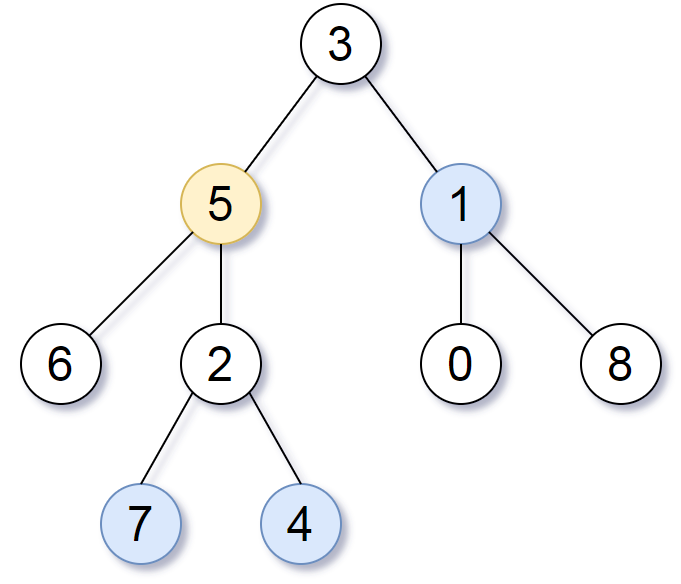

In [12]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None
        
def LinkParent(root, parent):
        
    queue = [root]
    while len(queue) > 0:
        n = len(queue)
        for i in range(n):
            node = queue.pop(0)
            if node.left != None:
                queue.append(node.left)
                parent[node.left] = node
            if node.right != None:
                queue.append(node.right)
                parent[node.right] = node

def distanceK(root, target, k):
    if root is None:
        return

    parent = {}
    LinkParent(root, parent)
        
    visited = [target]
    queue = [target]

    for i in range(k):
        n = len(queue)
        for j in range(n):
            node = queue.pop(0)
            if node.left != None and node.left not in visited:
                queue.append(node.left)
                visited.append(node.left)
            if node.right != None and node.right not in visited:
                queue.append(node.right)
                visited.append(node.right)
            if node in parent and parent[node] not in visited:
                queue.append(parent[node])
                visited.append(parent[node])
    res = []
    while len(queue) > 0:
        node = queue.pop(0)
        res.append(node.data)
    return res

root = Node(3)
root.left = Node(5)
root.left.left = Node(6)
root.left.right = Node(2)
root.left.right.left = Node(7)
root.left.right.right = Node(4)
root.right = Node(1)
root.right.left = Node(0)
root.right.right = Node(8)
target = root.left
distanceK(root, target, 2)

[7, 4, 1]

# Burning Tree

In [16]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def linkParent(root, target):
    parent = {}
    queue = [root]
        
    while len(queue)>0:
        n = len(queue)
        for i in range(n):
            node = queue.pop(0)
            if node.data == target:
                targetNode = node
            if node.left != None:
                queue.append(node.left)
                parent[node.left] = node
            if node.right != None:
                queue.append(node.right)
                parent[node.right] = node
                    
    return parent, targetNode
    
def minTime(root,target):
    if root is None:
        return 0
        
    parent, targetNode = linkParent(root, target)
        
    queue = [targetNode]
    visited = [targetNode]
    totalTime = 0
    while len(queue) > 0:
        n = len(queue)
        time = 0
        for i in range(n):
            node = queue.pop(0)
            if node.left != None and node.left not in visited:
                queue.append(node.left)
                visited.append(node.left)
            if node.right != None and node.right not in visited:
                queue.append(node.right)
                visited.append(node.right)
            if node in parent and parent[node] not in visited:
                queue.append(parent[node])
                visited.append(parent[node])
            time = 1
        totalTime += time
            
    return totalTime-1


root = Node(3)
root.left = Node(5)
root.left.left = Node(6)
root.left.right = Node(2)
root.left.right.left = Node(7)
root.left.right.right = Node(4)
root.right = Node(1)
root.right.left = Node(0)
root.right.right = Node(8)
target = 5
minTime(root, target)

3

# Count total nodes in binary Tree

In [5]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def countNodes(root):
    if root is None:
        return 0

    queue = [root]
    i = 0
    while len(queue):
        node = queue.pop(0)   
        if node.left != None:
            queue.append(node.left)
        if node.right != None:
            queue.append(node.right)
        i += 1
    return i

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
countNodes(root)

7

In [7]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def countNodes(root):
    if root is None:
        return 0

    return 1 + countNodes(root.left) + countNodes(root.right)

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
countNodes(root)

7

In [10]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def countNodes(root):
    if root is None:
        return 0

    lheight = 0
    rheight = 0
    leftNode = root
    rightNode =root
    while leftNode != None or rightNode != None:
        if leftNode != None :
            leftNode = leftNode.left
            lheight += 1
        if rightNode != None:
            rightNode = rightNode.right
            rheight += 1
    if lheight == rheight:
        return 2**lheight - 1
    return 1 + self.countNodes(root.left) + self.countNodes(root.right)

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
countNodes(root)

7

# Construct Binary Tree from inorder and preorder

In [8]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None
    

def findRoot(arr, key, low, n):

    for i in range(low,low+n):
        if arr[i] == key:
            return i
    
def buildTree(preorder, inorder, prelow, inlow, n):
    if n == 0:
        return
    if n == 1:
        return Node(preorder[prelow])

    root = Node(preorder[prelow])
    i = findRoot(inorder, preorder[prelow], inlow, n)
    
    llen = i-inlow
    rlen = inlow+n-1-i
    root.left =  buildTree(preorder, inorder, prelow+1,inlow,llen)
    root.right = buildTree(preorder, inorder, prelow+1+llen,i+1, rlen)
    return root

preorder = [1, 2, 4, 5, 3, 6, 7]
inorder = [4, 2, 5, 1, 6, 3, 7]
root = buildTree(preorder, inorder, 0, 0, len(preorder))
print(root.data)

1


In [34]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None
    
def buildTree(preorder, inorder, preStart, preEnd, inStart, inEnd, _hash):
    if preStart > preEnd or inStart > inEnd:
        return None
    root = Node(preorder[preStart])
    iRoot = _hash[preorder[preStart]]
    numsLeft = iRoot - inStart
    root.left = buildTree(preorder, inorder, preStart+1, preStart+numsLeft, inStart, iRoot-1, _hash)
    root.right = buildTree(preorder, inorder, preStart+numsLeft+1, preEnd, iRoot+1, inEnd, _hash)
    return root

preorder = [1, 2, 4, 5, 3, 6, 7]
inorder = [4, 2, 5, 1, 6, 3, 7]
_hash = {}
n = len(inorder)
for i in range(n):
    _hash[inorder[i]] = i
root = buildTree(preorder, inorder, 0, len(preorder)-1, 0, len(inorder)-1,  _hash)
print(root.data)

1


In [18]:

class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None
    

def findRoot(arr, key):
    n = len(arr)
    for i in range():
        if arr[i] == key:
            return i
    
def buildTree(preorder, inorder):
    if len(preorder) == 0:
            return
    if len(preorder) == 1:
        return Node(preorder[0])
    root = Node(preorder[0])
    i = findRoot(inorder, preorder[0])
    llen = i
    rlen = len(inorder)-i-1
    root.left = buildTree(preorder[1:1+llen],inorder[:i])
    root.right = buildTree(preorder[llen+1:], inorder[i+1:])
    return root

preorder = [1, 2, 4, 5, 3, 6, 7]
inorder = [4, 2, 5, 1, 6, 3, 7]
root = buildTree(preorder, inorder)
print(root.data)

1


# Construct a Binary Tree from Inorder and Postorder Traversal

In [41]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None
    
def buildTree(inorder, postOrder, inStart, inEnd, postStart, postEnd, _hash):
    if inStart > inEnd or postStart > postEnd:
        return None
    root = Node(postOrder[postEnd])
    iRoot = _hash[postOrder[postEnd]]

    numsleft = iRoot-inStart
    numsRight = inEnd-iRoot
    root.left = buildTree(inorder, postOrder, inStart, iRoot-1, postStart, postStart+numsleft-1, _hash)
    root.right = buildTree(inorder, postOrder, iRoot+1, inEnd, postStart+numsleft, postEnd-1, _hash)
    return root

inorder = [4, 2, 5, 1, 6, 3, 7]
postorder = [4, 5, 2, 6, 7, 3, 1]
_hash = {}
n = len(inorder)
for i in range(n):
    _hash[inorder[i]] = i
root = buildTree(inorder, postorder, 0, n-1, 0, n-1, _hash)
print(root.data)

1


# Serialize and deserialize Binary Tree

In [6]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def serialize(root):
    """Encodes a tree to a single string.
        
    :type root: TreeNode
    :rtype: str
    """
    if root is None:
        return ""

    queue = [root]
    traversal = ''

    while len(queue) > 0:
        node = queue.pop(0)
        if node is None:
            traversal += '#,'
        else:
            traversal += str(node.data)+','
        if node != None:
            queue.append(node.left)
            queue.append(node.right)
    return traversal

def deserialize(data):
    """Decodes your encoded data to tree.
        
    :type data: str
    :rtype: TreeNode
    """
    n = len(data)
    if n == 0:
        return None

    Traversal = data.split(',')

    root = Node(int(Traversal[0]))
    queue = [root]
    i = 0
    while len(queue) > 0:
        node = queue.pop(0)
        if node != None:
            if Traversal[i+1] != '#':
                node.left = Node(int(Traversal[i+1]))
            if Traversal[i+2] != '#':
                node.right = Node(int(Traversal[i+2]))
            queue.append(node.left)
            queue.append(node.right)
            i += 2
    return root


root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
serialize(root)

'1,2,3,4,5,6,7,#,#,#,#,#,#,#,#,'

# Morris Inorder Traversal 
- Threaded Binary Tree

In [11]:
# Optimal Approach : 
# Time Complexity : O(N)
# Space Complexity : O(1)


class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def inOrderTraversal(root):
    if root is None:
        return 
    inorder = []
    current = root
    while current != None:
        if current.left == None:
            inorder.append(current.data)
            current = current.right
        else:
            prev = current.left
            while prev.right != None and prev.right != current:
                prev = prev.right
            if prev.right == None:
                prev.right = current
                current = current.left
            else:
                prev.right = None
                inorder.append(current.data)
                current = current.right
    return inorder




root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
inOrderTraversal(root)

[4, 2, 5, 1, 6, 3, 7]

# Flatten Binary Tree to Linked List
- 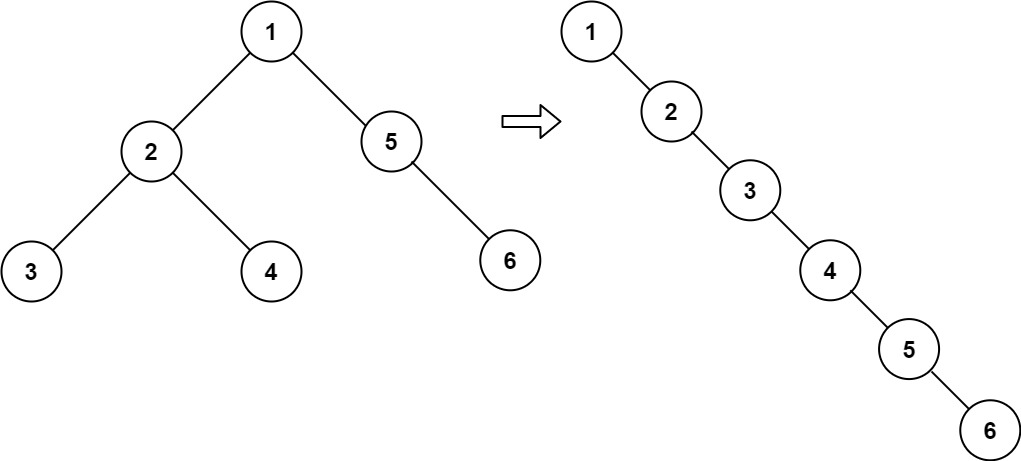

In [7]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def toLinkedList(current):
    if current == None:
        return None
    if current.left == None and current.right == None:
        return current
    lleaf = toLinkedList(current.left)
    rleaf = toLinkedList(current.right)

    if lleaf == None:
        return rleaf
    lleaf.right = current.right
    current.right = None
    current.right = current.left
    current.left = None

    if rleaf != None:
        return rleaf
    return lleaf



root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
toLinkedList(root)

In [15]:
class Node:
    def __init__(self, data):
        self.left = None
        self.data = data
        self.right = None

def toLinkedList(root):
    if root is None:
        return None
        
    stack = [root]
    while len(stack) > 0:
        node = stack.pop()
        if node.right != None:
            stack.append(node.right)
        if node.left != None:
            stack.append(node.left)
        if len(stack) > 0:
            node.right = stack[-1]
        node.left = None
    return root

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)
toLinkedList(root)